In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [23]:
coin=pd.read_csv("BTC-USD.csv")
coin

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704


In [24]:
coin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [25]:
coin.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704
2712,2022-02-19,40022.132813,40246.027344,40010.867188,40126.429688,40126.429688,22263900160


In [26]:
coin.shape

(2713, 7)

In [27]:
coin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


In [28]:
coin.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [29]:
coin.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<AxesSubplot:xlabel='High', ylabel='Count'>

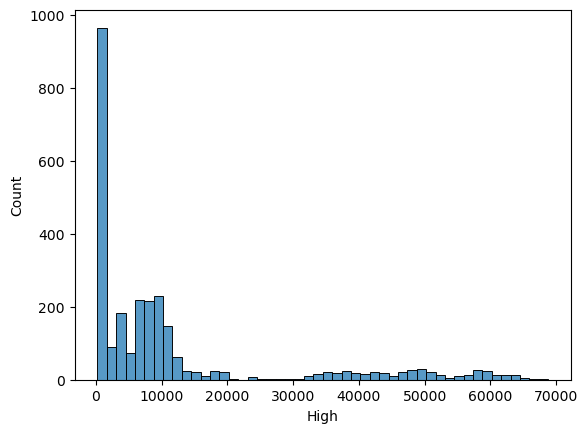

In [30]:
sns.histplot(x='High',data=coin)

In [31]:
y=coin['Adj Close']
y

0         457.334015
1         424.440002
2         394.795990
3         408.903992
4         398.821014
            ...     
2708    44575.203125
2709    43961.859375
2710    40538.011719
2711    40030.976563
2712    40126.429688
Name: Adj Close, Length: 2713, dtype: float64

In [32]:
x=coin.drop(['Adj Close','Date'],axis=1)
x

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2708,42586.464844,44667.218750,42491.035156,44575.203125,22721659051
2709,44578.277344,44578.277344,43456.691406,43961.859375,19792547657
2710,43937.070313,44132.972656,40249.371094,40538.011719,26246662813
2711,40552.132813,40929.152344,39637.617188,40030.976563,23310007704


In [33]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=1)

In [34]:
x.shape,X_train.shape,X_test.shape

((2713, 5), (2441, 5), (272, 5))

In [35]:
linear=LinearRegression()

In [36]:
linear.fit(X_train,y_train)
X_train_pred=linear.predict(X_train)
score=metrics.r2_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

linear.fit(X_test,y_test)
X_test_pred=linear.predict(X_test)
score=metrics.r2_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

accuracy score of trained data: 1.0
accuracy score of test data: 1.0


In [47]:
forest=RandomForestRegressor()

In [48]:
y

0         457.334015
1         424.440002
2         394.795990
3         408.903992
4         398.821014
            ...     
2708    44575.203125
2709    43961.859375
2710    40538.011719
2711    40030.976563
2712    40126.429688
Name: Adj Close, Length: 2713, dtype: float64

In [50]:
forest.fit(X_train,y_train)
X_train_pred=forest.predict(X_train)
score=metrics.r2_score(y_train,X_train_pred)
print('accuracy score of trained data:',score)

forest.fit(X_test,y_test)
X_test_pred=forest.predict(X_test)
score=metrics.r2_score(y_test,X_test_pred)
print('accuracy score of test data:',score)

accuracy score of trained data: 0.9999967417957814
accuracy score of test data: 0.9999146565654584


In [52]:
input_data=(465.864014,468.174011,452.421997,457.334015,21056800)
input_as_np=np.asarray(input_data)
reshaped=input_as_np.reshape(1,-1)
prediction=linear.predict(reshaped)
prediction

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([457.33401501])

In [54]:
print('The price is ',prediction[0])

The price is  457.3340150115548
